In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [44]:
df = pd.read_csv('USA Housing Dataset.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [45]:
zip = set()
for i in df['statezip'].tolist():
    zip.add(i.split(' ')[1])


print(len(list(zip)))
print(len(df['statezip'].tolist()))

77
4140


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# time
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)

df.drop(['country'], axis=1, inplace=True)

#encode
df = pd.get_dummies(df, columns=['city', 'statezip'], drop_first=True)

df.drop(['street'], axis=1, inplace=True)

#normalization
numerical_features = ['sqft_living', 'sqft_lot', 
                      'sqft_above', 'sqft_basement', 'yr_built', 
                      'yr_renovated', 'condition', 'view', 'waterfront']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df['price'] = df['price'].astype(int)

df.to_csv('USA_Housing_Dataset_cleaned_v3.csv', index=False)



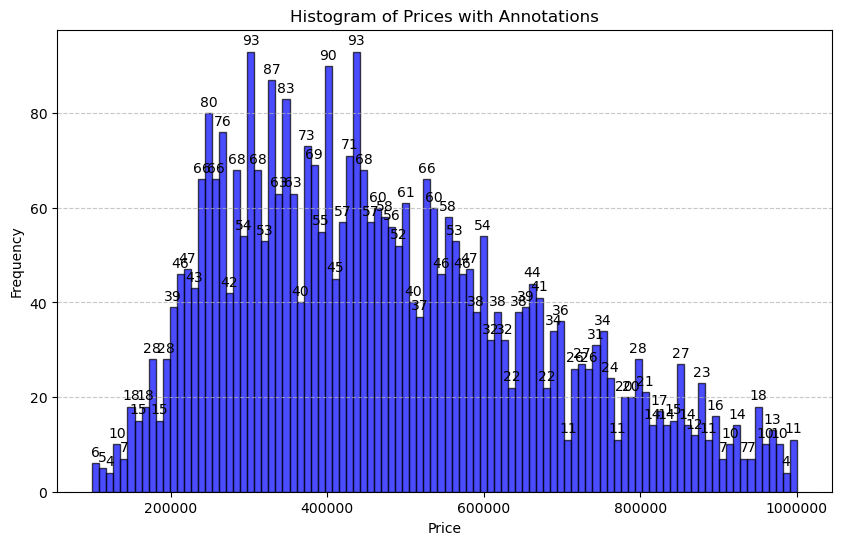

In [50]:
import matplotlib.ticker as ticker

df = pd.read_csv('USA_Housing_Dataset_cleaned_v3.csv')

# Plot histogram
ax = df['price'].plot.hist(bins=100, alpha=0.7, color='blue', edgecolor='black', figsize=(10, 6))

# Add annotations to each bar
for bar in ax.patches:  # Iterate through each bar in the histogram
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Calculate the center of each bar
    ax.annotate(f'{int(height)}', xy=(x, height), xytext=(0, 5), 
                textcoords='offset points', ha='center', fontsize=10, color='black')

# Add labels and title
plt.title("Histogram of Prices with Annotations")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# Show plot
plt.show()

In [49]:
df = pd.read_csv('USA_Housing_Dataset_cleaned_v3.csv')

# Filter out rows where 'price' > 5000000
df_filtered = df[df['price'] <= 1000000]
df_filtered = df_filtered[df_filtered['price'] >= 100000]
# Optional: Save the filtered DataFrame to a new CSV
df_filtered.to_csv('USA_Housing_Dataset_cleaned_v3.csv', index=False)
